***Movie Rating Prediction with Python***

In [ ]:
! pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]
warnings.simplefilter(action= "ignore", category=FutureWarning)

**Importing Dataset**

In [ ]:
ds=pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')

In [ ]:
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
ds.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
ds.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


**Checking null values in dataset**

In [ ]:
ds.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
ds.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
ds.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
ds=ds.dropna(subset=['Name'])

In [ ]:
ds['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [ ]:
ds['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [ ]:
ds.dropna(inplace=True)

In [ ]:
ds['Year'].value_counts()

(2019)    227
(2017)    211
(2018)    202
(2015)    177
(2016)    173
         ... 
(1931)      2
(1939)      2
(1934)      2
(1933)      1
(1932)      1
Name: Year, Length: 91, dtype: int64

P**rocessing specific columns in the dataset to ensure they are in a suitable format for further analysis.**

In [ ]:
ds['Year'] = ds['Year'].astype(str).str.replace('-', '')
ds['Duration']=ds['Duration'].str.replace('min','')
ds['Year'] = ds['Year'].str.replace(r'\D', '', regex=True)
# Convert the 'Year' column to integers
ds['Year'] = ds['Year'].astype(int)
ds['Rating']=ds['Rating'].astype(int)
ds['Votes'] = ds['Votes'].str.replace(r'\D', '', regex=True)
ds['Votes']=ds['Votes'].astype(int)

In [ ]:
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


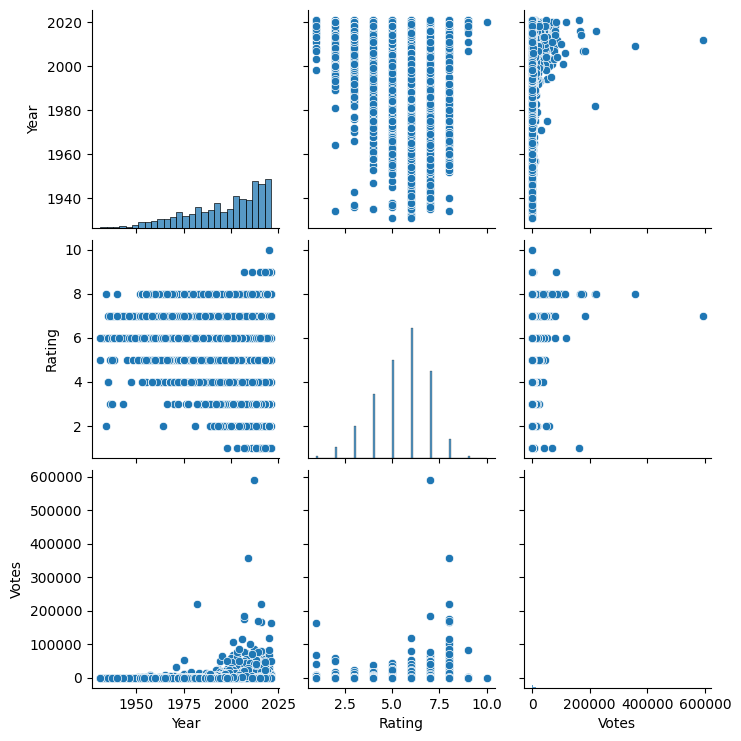

In [ ]:
sns.pairplot(ds)
plt.show()

<Axes: >

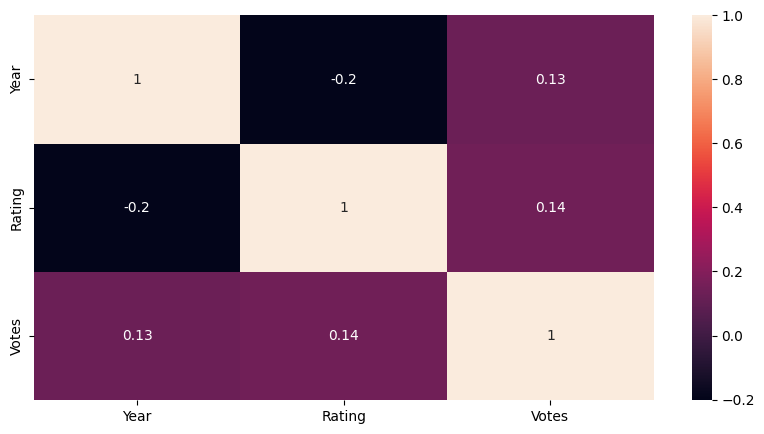

In [ ]:
sns.heatmap(ds.corr(), annot=True)

**With the help of correlation graph we have analyzed that there is an strong relationship between rating and votes features.**

In [ ]:
ds.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
ds['Genre']=lb.fit_transform(ds['Genre'])
ds['Director']=lb.fit_transform(ds['Director'])
ds['Actor 1']=lb.fit_transform(ds['Actor 1'])
ds['Actor 2']=lb.fit_transform(ds['Actor 2'])
ds['Actor 3']=lb.fit_transform(ds['Actor 3'])

In [ ]:
x=ds.drop("Name", axis=1)
y=ds['Rating']

In [ ]:
print(x)
print(y)
x.describe()

       Year Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
1      2019     109     229       7      8       629     1352     2272   
3      2019     110     184       4     35      1335     1198      719   
5      1997     147     157       4    827      1530      378       75   
6      2005     142     289       7   1086      2044      692     1112   
8      2012      82     320       5    326       135     1934     1175   
...     ...      ...    ...     ...    ...       ...      ...      ...   
15493  2015     115     229       6    408      1223     1861     1801   
15494  2001     153     133       6   1496      2059      763     1619   
15503  1989     125      28       5     44      1793      406      754   
15505  1999     129      38       4    655      1025      112     2164   
15508  1998     130      38       6     20       895      468      753   

       Actor 3  
1          319  
3         2148  
5         2045  
6         2524  
8         1013  
...      

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,171.728221,5.452023,2697.649585,1211.864994,966.963598,1182.761442,1276.103375
std,19.741839,108.208770,1.419934,13651.503584,686.698545,564.890824,666.834013,720.046925
min,1931.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,47.000000,5.000000,30.000000,637.000000,468.000000,617.000000,652.500000
50%,2002.000000,184.000000,6.000000,131.000000,1198.000000,971.000000,1198.000000,1306.000000
75%,2013.000000,248.000000,6.000000,922.500000,1793.000000,1472.000000,1767.500000,1868.500000
max,2021.000000,375.000000,10.000000,591417.000000,2430.000000,1959.000000,2320.000000,2555.000000


**Normalizing Dataset by using MinMaxScaler function**

Different features in dataset might have different ranges. For example, 'Year' might range from 1900 to 2022, while 'Votes' could range from a few hundred to several million. MinMaxScaler() function scales each feature individually so that the values have a given minimum and maximum value, with a default of 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=['Year','Duration','Genre','Rating','Votes','Director','Actor 1','Actor 2', 'Actor 3']
sc=MinMaxScaler()
x[columns_to_scale]=sc.fit_transform(x[columns_to_scale])

**Splitng Dataset in training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.20, random_state=42)

**Importing Support Vector Machine Algorithm**

SVMs are powerful algorithms for classification tasks, especially when the relationship between features and target classes is complex.Here we used Linear Support Vector Classifier for classification.

In [ ]:
from sklearn.svm import LinearSVC

**Importing classification_report function**

It provides a summary of important classification metrics, including precision, recall, F1-score, and support, for each class in your classification problem. It's a handy tool to evaluate the performance of your classification model.

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
m1=LinearSVC()
m1.fit(x_train, y_train)
y_p=m1.predict(x_test)

In [ ]:
y_p

array([6, 3, 4, ..., 5, 6, 6])

In [ ]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        27
           3       0.54      0.42      0.47        77
           4       0.68      0.54      0.60       174
           5       0.66      0.58      0.62       244
           6       0.73      0.99      0.84       324
           7       0.84      0.97      0.91       240
           8       1.00      0.02      0.05        42
           9       0.00      0.00      0.00         2

    accuracy                           0.73      1132
   macro avg       0.50      0.39      0.39      1132
weighted avg       0.71      0.73      0.69      1132



**Cross Validation:**

Cross-validation is a technique used to assess how well a machine learning model will generalize to an independent dataset. It's particularly useful when you want to evaluate the model's performance multiple times with different subsets of the data.

In [ ]:
bestest_model=LinearSVC(C=0.3, max_iter=10000)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds=5
kf=KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores=cross_val_score(bestest_model, x,y, cv=kf, scoring='accuracy')
print("cross_validation_score", scores)
print("Mean_Score", scores.mean())

cross_validation_score [0.70759717 0.69787986 0.71819788 0.7164311  0.69761273]
Mean_Score 0.7075437478325257


**Mean Squared Error:**

The mean squared error provides a measure of how well your model is performing in terms of predicting the ratings.A lower mean squared error indicates that the model's predictions are closer to the actual ratings.

In [ ]:
from sklearn.metrics import mean_squared_error
ME= mean_squared_error(y_test, y_p)
print("Mean Squared error", ME)

Mean Squared error 0.3003533568904594
